# $$\text{Q.1 HW03}$$ 

# These quantites apply for all the parts in the question

#### $$p(v_{m} | d, H_{0}) = \frac{1}{\sqrt{2\pi}\sigma_{v_m}} exp\left({-\frac{(v_{m} - H_{0}d)^2}{2\sigma_{v_m}^2}}\right) $$


#### $$p(d|v_{m}) \propto  p(v_{m}|d)p(d) = \int_{H_{0}} p(v_{m}|H_{0},d) p(H_{0}) p(d) \text{ }dH_{0}$$


#### $$p(d) = \frac{1}{\Delta d} = \frac{1}{800}$$

---

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statistics as stat
from matplotlib.colors import LogNorm
from matplotlib.pyplot import *

font = {'size': 14}

matplotlib.rc('font', **font)

In [2]:
def pvm(sig, vm, H, d): #this is just the function p(vm | d, H0)
    p_vm = (1/(np.sqrt(2*np.pi)*sig)) * np.exp(-((vm - H*d)**2)/(2 * sig**2))
    return p_vm

sig = 1 * 10**3;
vm = 30 * 10**3;
pd = 1/800;

---

## a, b) $$p(H_{0}) = \delta_{H_{0} - 75}$$

---

### part (a) Plotting the pdf $p(d|v_{m})$

In [3]:
H = 75;
d_list = np.linspace(0, 800, 1001) #generates a list of d for the plot
pvm_list = pvm(sig, vm, H, d_list) #generates a list of p(vm | d, H0) for the list of d

In [4]:
# p refers to p(d|vm)
areaUnderPd = np.trapz(pvm_list, d_list) 

#the above is true because the integral of a delta function respect to the function over all possitble values is just 1

p_list_norm = pvm_list/areaUnderPd 
#we are normalizing our list of p(d|vm) by dividing the list of p(vm | d, H0) by the area p

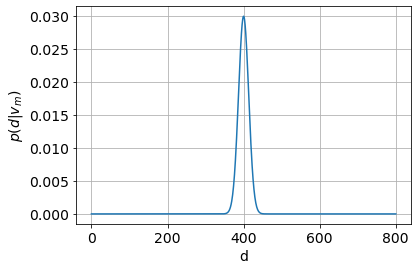

In [5]:
# now we have a list of p(d|vm) and a list of d so we can plot it
plt.plot(d_list, p_list_norm)
plt.xlabel("d")
plt.ylabel(r"$p(d|v_{m})$")
plt.grid()
plt.show()

### part (b) Finding $\hat{d}$ and the 68% confidence interval

In [6]:
#just finds the index where p(d|vm) is max and then prints the corresponding d value as d_hat
indexOfMaxProb = np.where(p_list_norm == max(p_list_norm))
d_hat = d_list[indexOfMaxProb]
print("d-hat: " + str(float(d_hat)))

d-hat: 400.0


In [7]:
#starts at the left of the distribution in the figure above. Calculates area till we hit 16% of
#the area while keeping track of the index and prints the corresponding d of that index

i = 1
area = 0
while(area < (0.5 - 0.34)):
    x_list, y_list = d_list[:i], p_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1

print("left limit of d-hat: " + str(d_list[i]))

left limit of d-hat: 388.8


In [8]:
#starts at the left of the distribution in the figure above. Calculates area till we hit 84% of
#the area while keeping track of the index and prints the corresponding d of that index

i = 1
area = 0
while(area < (0.5 + 0.34)):
    x_list, y_list = d_list[:i], p_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1

print("right limit of d-hat: " + str(d_list[i]))

right limit of d-hat: 415.20000000000005


 ### $$\therefore \hat{d} = 400$$
 ### $$ 388.8 < \hat{d} < 415.2 $$

---

# c,d) $$p(H_{0}) = \frac{1}{\Delta H_{0}} = \frac{1}{40}$$

---

### part (c) Plotting the pdf $p(d|v_{m})$

In [9]:
H = np.linspace(50, 90, 1001)
pH = 1/40

#pd_list is the list of p(d|vm) for all d in d_list
pd_list = []
for d in d_list:
    pd_list.append(np.trapz(pvm(sig, vm, H, d) * pH * pd, H))

In [10]:
#once more we are normalizing p(d|vm) by dividing it by the area of p(d|vm)
areaUnderPd = np.trapz(pd_list, d_list)

p_list_norm = pd_list/areaUnderPd

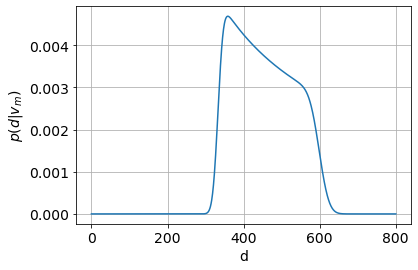

In [11]:
plt.plot(d_list, p_list_norm)
plt.xlabel("d")
plt.ylabel(r"$p(d|v_{m})$")
plt.grid()
plt.show()

### part (d) Finding $\hat{d}$ and the 68% confidence interval

In [12]:
indexOfMaxProb = np.where(p_list_norm == max(p_list_norm))
d_hat = d_list[indexOfMaxProb]
print("d-hat: " + str(float(d_hat)))

d-hat: 358.40000000000003


In [13]:
i = 1
area = 0
while(area < (0.5 - 0.34)):
    x_list, y_list = d_list[:i], p_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("left limit of d-hat: " + str(d_list[i]))

left limit of d-hat: 368.0


In [14]:
i = 1
area = 0
while(area < (0.5 + 0.34)):
    x_list, y_list = d_list[:i], p_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1

print("right limit of d-hat: " + str(d_list[i]))

right limit of d-hat: 548.0


 ### $$\therefore \hat{d} = 358.4$$

 ### $$368.0 < \hat{d} < 548.0$$

---

# e,f) $$p(H_{0}) = \frac{1}{H_{0}} \frac{1}{ln(H_{0_{max}}/H_{0_{min}})}$$

---

### part (e) Plotting the pdf $p(d|v_{m})$

In [15]:
H = np.linspace(50, 90, 1001)

#distributes H into a Jeffries 
pH = (1/H)*(1/np.log(90/50)) 

pd_list = []
for d in d_list:
    pd_list.append(np.trapz(pvm(sig, vm, H, d) * pH * pd, H))

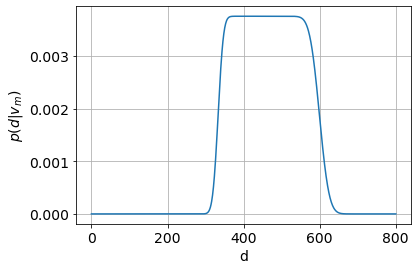

In [16]:
areaUnderPd = np.trapz(pd_list, d_list)

pd_list_norm = pd_list/areaUnderPd

plt.plot(d_list, pd_list_norm)
plt.xlabel("d")
plt.ylabel(r"$p(d|v_{m})$")
plt.grid()
plt.show()

### part (f) Finding $\hat{d}$ and the 68% confidence interval

In [17]:
indexOfMaxProb = np.where(pd_list_norm == max(pd_list_norm))
d_hat_list = d_list[indexOfMaxProb] #since it's a flat line we have an array 
d_hat = np.median(d_hat) #just use the median of that array as d-hat
print("d-hat: " + str(float(d_hat)))

d-hat: 358.40000000000003


In [18]:
i = 1
area = 0
while(area < (0.5 - 0.34)):
    x_list, y_list = d_list[:i], pd_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("left limit of d-hat: " + str(d_list[i]))

left limit of d-hat: 377.6


In [19]:
i = 1
area = 0
while(area < (0.5 + 0.34)):
    x_list, y_list = d_list[:i], pd_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("right limit of d-hat: " + str(d_list[i]))

right limit of d-hat: 559.2


 ### $$\therefore \hat{d} = 432.0$$

 ### $$377.6 < \hat{d} < 559.2$$

---

# g,h) $$p(H_{0}) = \frac{1}{\sqrt{2\pi}\sigma_{H_{0}}} exp\left(\frac{(H_{0}-H'_{0})^2}{2\sigma_{H_{0}}^2}\right) $$
where $H'_{0}$ is given two values 

---

### part (g) Plotting the pdf $p(d|v_{m})$

### 1, 2)

In [20]:
# function that distributes a list of H0 into a gaussian
def gaussH(H0, mu, sigma):
    gaussH0 = (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-((H0 - mu)**2)/(2 * sigma**2))
    return gaussH0

In [21]:
# #generates list of H0 values to be distributed as a gaussian using gaussH function
H0 = np.linspace(50,80, 1001)

In [22]:
pd01_list = []
pd02_list = []

for d in d_list:
    pd01_list.append(np.trapz(pvm(sig, vm, H0, d) * gaussH(H0, 74.03, 1.42) * pd, H0))
    pd02_list.append(np.trapz(pvm(sig, vm, H0, d) * gaussH(H0, 67.66, 0.42) * pd, H0))

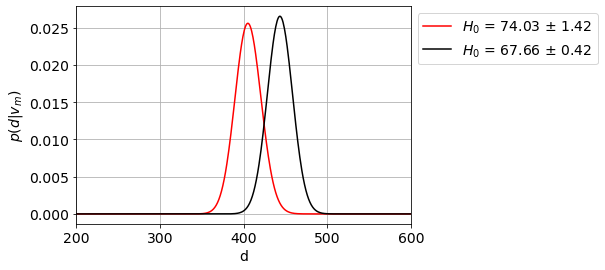

In [23]:
areaUnderPd01 = np.trapz(pd01_list, d_list)
areaUnderPd02 = np.trapz(pd02_list, d_list)

pd01_list_norm = pd01_list/areaUnderPd01
pd02_list_norm = pd02_list/areaUnderPd02

plt.plot(d_list, pd01_list_norm, color = "red", label = r"$H_{0}$ = 74.03 $\pm$ 1.42")
plt.plot(d_list, pd02_list_norm, color = "black", label = r"$H_{0}$ = 67.66 $\pm$ 0.42")
plt.xlabel("d")
plt.ylabel(r"$p(d|v_{m})$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1.08, 0.5, 0.5, 0.5))
plt.xlim(200, 600)

plt.show()

### part (h) Finding $\hat{d}$ and the 68% confidence interval

#### 1)

In [24]:
indexOfMaxProb = np.where(pd01_list_norm == max(pd01_list_norm))
d_hat = d_list[indexOfMaxProb] #since it's a flat line we have an array 
print("d-hat: " + str(float(d_hat)))

d-hat: 404.8


In [25]:
i = 1
area = 0
while(area < (0.5 - 0.34)):
    x_list, y_list = d_list[:i], pd01_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("left limit of d-hat: " + str(d_list[i]))

left limit of d-hat: 392.0


In [26]:
i = 1
area = 0
while(area < (0.5 + 0.34)):
    x_list, y_list = d_list[:i], pd01_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("right limit of d-hat: " + str(d_list[i]))

right limit of d-hat: 423.20000000000005


#### 2)

In [27]:
indexOfMaxProb = np.where(pd02_list_norm == max(pd02_list_norm))
d_hat = d_list[indexOfMaxProb] #since it's a flat line we have an array 
print("d-hat: " + str(float(d_hat)))

d-hat: 443.20000000000005


In [28]:
i = 1
area = 0
while(area < (0.5 - 0.34)):
    x_list, y_list = d_list[:i], pd02_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("left limit of d-hat: " + str(d_list[i]))

left limit of d-hat: 430.40000000000003


In [29]:
i = 1
area = 0
while(area < (0.5 + 0.34)):
    x_list, y_list = d_list[:i], pd02_list_norm[:i]
    area = np.trapz(y_list, x_list)
    i += 1


print("right limit of d-hat: " + str(d_list[i]))

right limit of d-hat: 460.0


 #### 1) $H_{0}$ = 74.03 $\pm$ 1.42
 #### $$\therefore \hat{d} = 404.8$$

 #### $$392.0 < \hat{d} < 423.2$$
 
 #### 2) $H_{0}$ = 67.66 $\pm$ 0.42
 #### $$\therefore \hat{d} = 443.2$$

 #### $$430.4 < \hat{d} < 460.0$$
 
 #### The $\hat{d}$ do agree with each other within the credible interval